**BAN**-**210_NAA**

**Predictive** **Analytics**

***Mid Term***

**Maaz Hussain**

***ID # 173714221***

**Professor: Dr. Savita Seharawat**

In [2]:
# Importing all necessary libraries required for this Exam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Loading the dataset from URL
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, delimiter=";")

# Display the first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Q1: Check the datatypes of the attributes.**

In [4]:

print("Data Types of Attributes:")
print(df.dtypes)


Data Types of Attributes:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


**Q2: Are there any missing values in the dataset?**

In [5]:
print("Missing Values Count:")
print(df.isnull().sum())


Missing Values Count:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


**Q3: What is the correlation between the attributes other than Quality?**

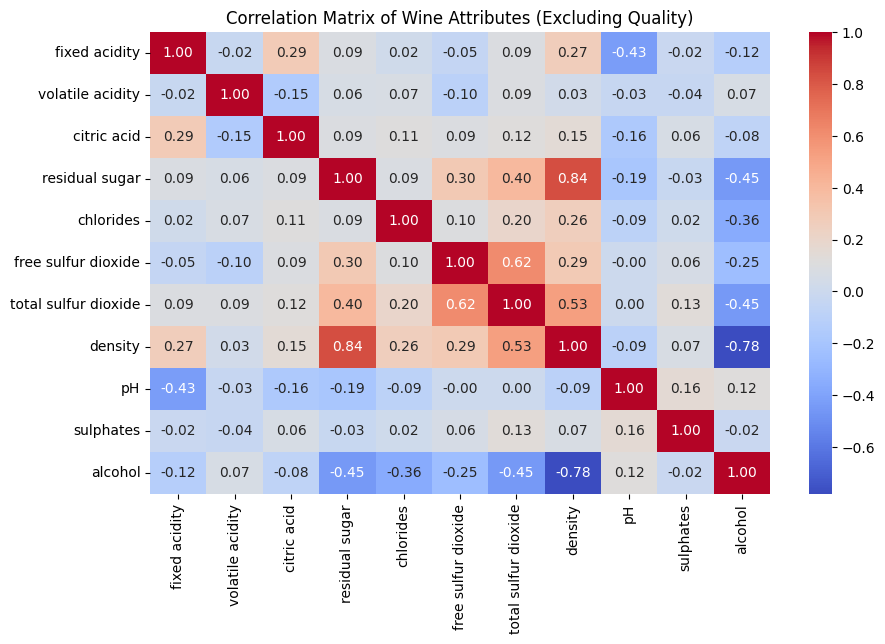

In [8]:
correlation_matrix = df.drop(columns=['quality']).corr()

# Plotting heatmap for correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Wine Attributes (Excluding Quality)")
plt.show()


**Q4: Graph the frequency distribution of wine quality.**

<ipython-input-10-aa597a9fc51b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['quality'], palette="coolwarm")


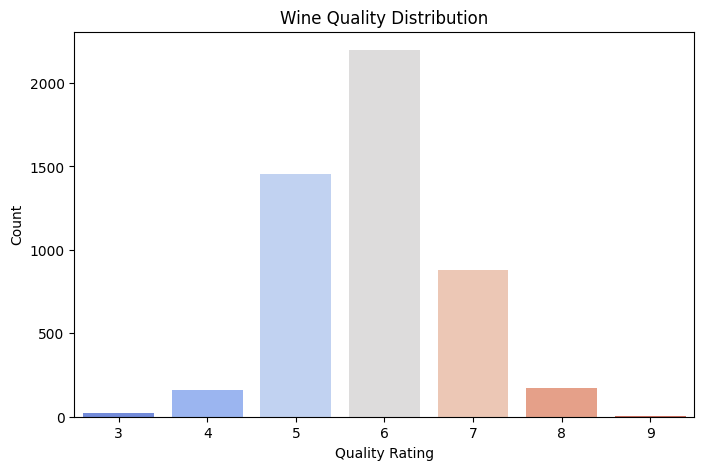

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['quality'], palette="coolwarm")
plt.title("Wine Quality Distribution")
plt.xlabel("Quality Rating")
plt.ylabel("Count")
plt.show()


**Q5: Reduce wine quality levels to 3 categories.a**

In [16]:

df['quality_level'] = df['quality'].apply(lambda x: 0 if x in [3, 4] else (1 if x in [5, 6] else 2))
df['quality_category'] = df['quality'].apply(categorize_quality)

# Display value counts of new categories
print("Wine Quality Categories Distribution:")
print(df['quality_category'].value_counts())

Wine Quality Categories Distribution:
quality_category
1    3655
2    1060
0     183
Name: count, dtype: int64


**Q6: Normalize the dataset.**

In [17]:
# Normalize feature columns (excluding 'quality' and 'quality_category')
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.columns[:-2]] = scaler.fit_transform(df[df.columns[:-2]])

# Display first few rows of normalized data
df_scaled.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level,quality_category
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5,1,1
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5,1,1
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5,1,1
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5,1,1
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5,1,1


**Q7: Divide dataset into training and testing sets.**

In [19]:
X = df_scaled.drop(columns=['quality', 'quality_category'])
y = df_scaled['quality_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (3918, 12)
Testing Set Size: (980, 12)


**Q8: Use Decision Tree Algorithm to predict wine quality.**

In [24]:

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


**Q9: Display the Confusion Matrix.**

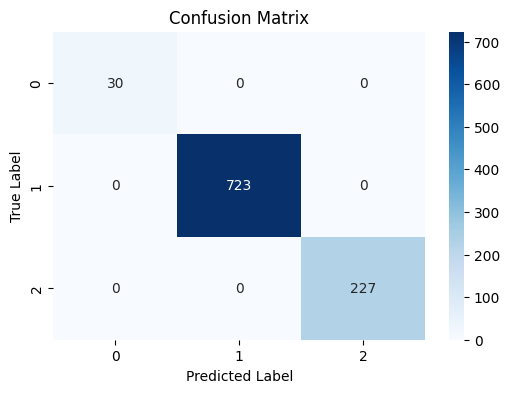

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**Q10: Evaluate Model Performance (Accuracy).**

In [27]:
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00
